<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_01_regression/blob/main/00_tensorflow_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan awal tentang Tensorflow

### Ada beberapa yang bakal kita lakukan disini yaitu :
- kita akan menggunakan tensorflow -> untuk membuat model
- lalu kita juga akan menggunakan matplotlib -> untuk memvisualisasikan data yang kita gunakan
- setelah itu kita juga akan membuat model pertama kita menggunakan tensorflow
- lalu kita juga akan mengevaluasi model yang telah dibuat dengan tuning yang berbeda

### Algoritma yang kita akan gunakan yaitu Regression dan Evaluasi yang akan kita gunakan adalah MAE (Mean Absolute Error)

### Pertama tama kita akan melakukan import tensorflow dan matplotlib terlebih dahulu

In [ ]:
# Import Tensorflow
import tensorflow as tf
# Import Matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Kita akan mengecek versi tensorflow terlebih dahulu, dengan begitu kita bisa tau versi tensorflow yang digunakan
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


### Selanjutnya kita akan membuat data yang akan kita training, kali ini kita akan melakukan dengan data sederhana terlebih dahulu

In [ ]:
# Kita akan membuat data X dan y
# Data X adalah data dari -100 hingga 100 dengan jarak masing masing adalah 4

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Selanjutnya kita akan membuat data y
# Data y adalah data dari range X namun kita tambahkan 10
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

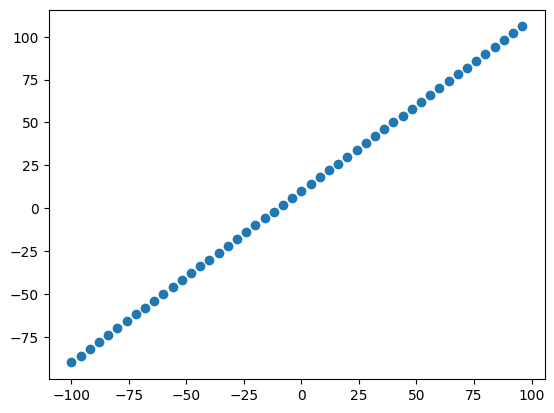

In [ ]:
# Mari kita visualisasikan data X dan y secara sederhana terlebih dahulu
plt.scatter(X,y)

### Selanjutnya mari kita membuat model sederhana dengan tensorflow

Step by step untuk membuat model sederhana dengan tensorflow

1. Create Model -> define input dan output
2. Compile Model -> define loss function (loss dalam artian kita harus tau untuk evaluasi model yang telah kita buat seberapa bagus, dan juga kita bisa membuat evaluasi tentang model yang dibuat)
3. Fitting Model -> letting model find pattern dari X dan y (features dan labels)

In [ ]:
X.ndim,y.ndim

(1, 1)

In [ ]:
# Step 1 Create Model
# Untuk saat ini kita akan membuat model sederhana dengan 1 hidden layer tanpa activation
# Untuk model yang akan kita buat untuk saat ini adalah tf.keras.Sequential

# Untuk saat ini kita akan menggunakan set seed agar pelatihan model dan pengulangan terjadi secara sama
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Step 2 Compile Model
# Kita akan compile model sederhana yang kita buat dengan Loss dan Metrics MAE dan untuk optimizer kita akan menggunakan SGD (stochastic gradient descent)
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Step 3 Fitting Model
# Pada saat kita fit model seharusnya syntax nya seperti ini
# model.fit(X,y,epochs=5)
# Namun kita harus sedikit memodifikasi karna ndim x dan y hanya 1 sedangkan minimal ndim seharusnya ada 2
# Epochs adalah lap seperti dalam balapan -> jadi model yang kita buat ini akan melakukan 5 putaran untuk mempelajari data yang ada
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 7ms/step - loss: 122.0167 - mae: 122.0167
Epoch 2/5
2/2 [==============================] - 0s 4ms/step - loss: 72.0737 - mae: 72.0737
Epoch 3/5
2/2 [==============================] - 0s 4ms/step - loss: 23.9749 - mae: 23.9749
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 13.6803 - mae: 13.6803
Epoch 5/5
2/2 [==============================] - 0s 4ms/step - loss: 15.5783 - mae: 15.5783


In [ ]:
# Melakukan predict
# Sebelum itu mari kita lihat data X dan y terlebih dahulu
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Bisa dilihat dari data diatas masing masing kita bisa langsung tahu bahwa dari angka n ke angka ke depan adalah 4
# Jadi kalau kita melakukan prediksi angka 100, maka harusnya y nya adalah 110
model.predict([100])

1/1 [==============================] - 0s 96ms/step


array([[77.71062]], dtype=float32)

In [ ]:
# Ternyata model nya masih terlalu buruk karna seharusnya pada saat kita memasukan angka 100 jawaban yang seharusnya adalah 110

### Model pertama sudah berhasil dibuat, namun hasilnya sedikit mengecewakan karna jauh dari jawaban yang seharusnya

pada section kali ini mari kita sedikit evaluasi model yang telah kita buat, ada beberapa cara untuk mengevaluasi model yang telah kita buat

Creating Model (Step 1) :
- Kita bisa menambahkan layer dan menaikan number dari layer itu sendiri (neuron) contoh -> **tf.keras.layers.Dense(100,activation="relu")**

Compile Model (Step 2) :
- Kita juga bisa menggunakan optimizer berbeda dan menambahkan learning rate dari optimizer function contoh : -> model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics="mae")

Fitting Model (Step 3) :
- Kita juga bisa menambahkan lap (epochs) pada model yang kita buat, walaupun lebih lama dalam melakukan training bisa jadi memungkinkan bahwa dengan menaikan epochs kita bisa mendapatkan hasil yang lebih maksimal
- Atau bisa juga dengan menambahkan data X dan y

In [ ]:
# Mari kita buat ulang model seperti diatas
# Pada percobaan pertama kita akan menambahkan Epochs terlebih dahulu menjadi 100

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 108.4287 - mae: 108.4287
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 58.5869 - mae: 58.5869
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 16.4367 - mae: 16.4367
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2305 - mae: 10.2305
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3418 - mae: 12.3418
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9478 - mae: 12.9478
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8476 - mae: 10.8476
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.9007 - mae: 13.9007
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 14.7508 - mae: 14.7508
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0185 - mae: 10.0185
Epoch 11/100
2/2 [==============================] - 0s 4m

In [ ]:
# Mari kita lihat terlebih dahulu X dan y
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Seharusnya saat kita memasukan angka 100, jawaban yang benar adalah 110, mari kita coba
model.predict([100])

1/1 [==============================] - 0s 71ms/step


array([[90.228935]], dtype=float32)

In [ ]:
# Masih jauh dari harapan, namun setidaknya membaik, maka dari itu mari kita coba membuat model dengan hidden layer yang lebih banyak dan kita buat juga dengan activation='relu'
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 35.2434 - mae: 35.2434
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 14.0674 - mae: 14.0674
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 15.0276 - mae: 15.0276
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7495 - mae: 13.7495
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9631 - mae: 12.9631
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 16.0549 - mae: 16.0549
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7956 - mae: 9.7956
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 15.7155 - mae: 15.7155
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 16.6656 - mae: 16.6656
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.3814 - mae: 13.3814
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [ ]:
# Mari kita coba predict
model.predict([100])

# Ternyata hasilnya malah lebih buruk, mari kita coba gunakan activation=None

1/1 [==============================] - 0s 74ms/step


array([[75.51567]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 59.0581 - mae: 59.0581
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 31.7120 - mae: 31.7120
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.9530 - mae: 29.9530
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 26.2035 - mae: 26.2035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 24.4336 - mae: 24.4336
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 20.3462 - mae: 20.3462
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 21.0032 - mae: 21.0032
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 17.1511 - mae: 17.1511
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 25.7183 - mae: 25.7183
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 20.3083 - mae: 20.3083
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [ ]:
# Mari kita coba predict (saat input 100 output seharusnya adalah 110)
model.predict([100])

1/1 [==============================] - 0s 77ms/step


array([[145.77362]], dtype=float32)

In [ ]:
# Sekarang mari kita coba menggunakan optimizer yang berbeda, kali ini kita akan menggunakan optimizer adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 26.7012 - mae: 26.7012
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.8942 - mae: 24.8942
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 23.3450 - mae: 23.3450
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 21.6683 - mae: 21.6683
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 19.9977 - mae: 19.9977
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 18.4133 - mae: 18.4133
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 16.7288 - mae: 16.7288
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1555 - mae: 15.1555
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8633 - mae: 13.8633
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3743 - mae: 12.3743
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [ ]:
# Mae terlihat bagus, namun mari kita coba predict
model.predict([100])

1/1 [==============================] - 0s 48ms/step


array([[94.39033]], dtype=float32)

In [ ]:
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 70.3695 - mae: 70.3695
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 51.6663 - mae: 51.6663
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 35.6175 - mae: 35.6175
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0842 - mae: 19.0842
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8443 - mae: 10.8443
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8279 - mae: 13.8279
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 17.7622 - mae: 17.7622
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 16.2481 - mae: 16.2481
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5072 - mae: 12.5072
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3761 - mae: 9.3761
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [ ]:
# MAE nya sangat baik, tapi mari kita lihat hasil prediksi dari model yang sudah di training
model.predict([100])

1/1 [==============================] - 0s 45ms/step


array([[105.71115]], dtype=float32)

In [ ]:
# Model sudah lebih baik, mari kita tuning sedikit lagi learning rate nya
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 71.5733 - mae: 71.5733
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 55.2695 - mae: 55.2695
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 40.9126 - mae: 40.9126
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 25.2470 - mae: 25.2470
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.7148 - mae: 12.7148
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6473 - mae: 10.6473
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 16.8771 - mae: 16.8771
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 17.5628 - mae: 17.5628
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 14.4385 - mae: 14.4385
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8456 - mae: 9.8456
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [ ]:
model.predict([100])

# Sofar hasil nya cukup memuaskan

1/1 [==============================] - 0s 76ms/step


array([[109.99686]], dtype=float32)